<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [11]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:>

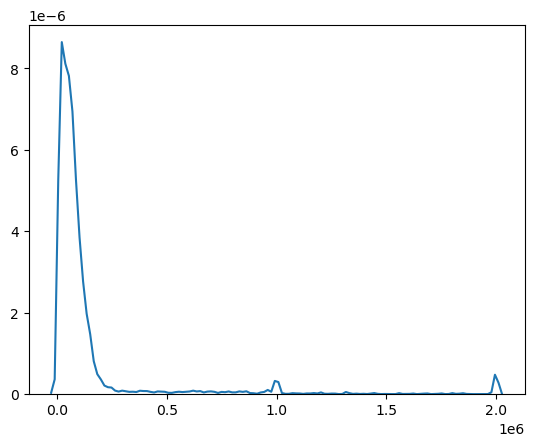

In [45]:
# your code goes here

import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

x = df[["ConvertedComp"]].dropna(axis=0, inplace= False)


sns.distplot(x, hist=False, kde=True)


Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:>

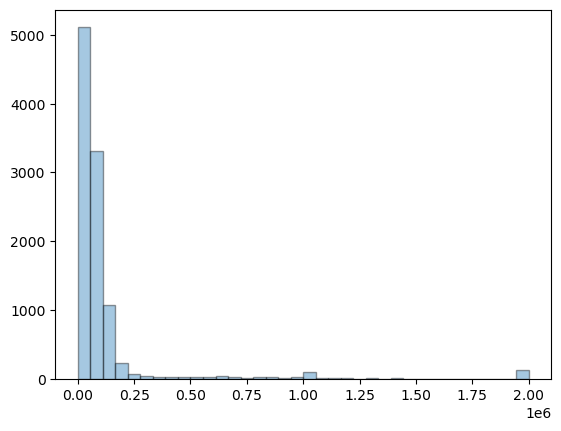

In [46]:
# your code goes here

sns.distplot(x, hist=True, kde=False, bins=int(180/5), hist_kws={'edgecolor':'black'})

What is the median of the column `ConvertedComp`?


In [50]:
# your code goes here
print('df median: ', df[["ConvertedComp"]].median(), 'x median: ', x.median())

df median:  ConvertedComp    57745.0
dtype: float64 x median:  ConvertedComp    57745.0
dtype: float64


How many responders identified themselves only as a **Man**?


In [77]:
# your code goes here
df[(df['Gender']=='Man')]['Gender'].value_counts()

Man    10480
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [90]:
# your code goes here
dfw=df[(df['Gender'] == 'Woman')]
print('median woman ConvertedComp =' , dfw['ConvertedComp'].median())

median woman ConvertedComp = 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [91]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age'>

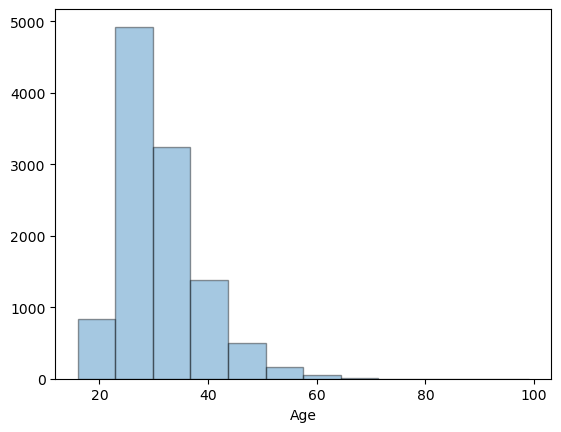

In [94]:
# your code goes here

sns.distplot(df['Age'], hist=True, kde=False, bins=int(100/8), hist_kws={'edgecolor':'black'})

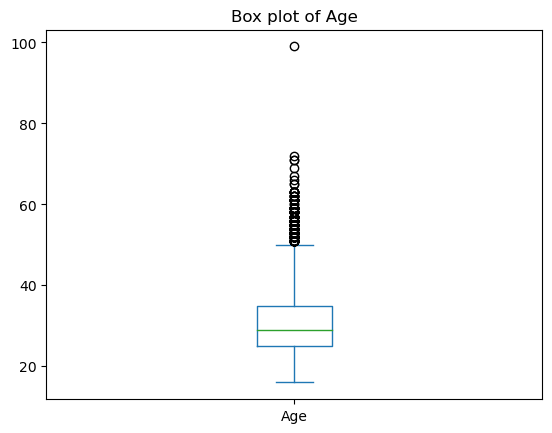

In [182]:
# your code goes here
df[['Age']].plot(kind='box')

plt.title('Box plot of Age')

plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


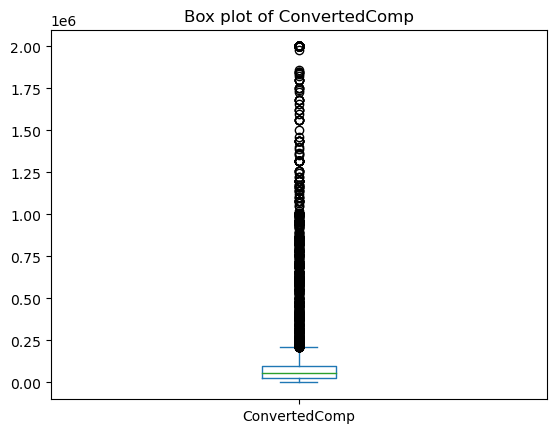

In [98]:
# your code goes here
df[['ConvertedComp']].plot(kind='box')

plt.title('Box plot of ConvertedComp')

plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [129]:
# your code goes here
outlier = df[['ConvertedComp']].describe()
Q1 = float(outlies.iloc[4:5,0:1].values[0])
Q3 = float(outlies.iloc[6:7,0:1].values[0])
#Q1.reset_index(drop=True, inplace=True)

IQR = Q3-Q1

IQR

73132.0

Find out the upper and lower bounds.


In [131]:
# your code goes here

upperBounds = Q3 + (1.5 * IQR)
lowerBounds = Q1 - (1.5 * IQR)

print('upperBounds: ', upperBounds, 'lowerBounds: ', lowerBounds)

upperBounds:  209698.0 lowerBounds:  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [165]:
# your code goes here
df[(df['ConvertedComp'] > upperBounds) | (df['ConvertedComp'] < lowerBounds)]
#879 rows × 85 columns

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
13,32,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,Associate degree,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,21.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
45,100,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Woman,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
46,102,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,37.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
60,128,"I am not primarily a developer, but I write co...",Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,30.0,Man,No,Bisexual,White or of European descent,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11296,24915,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,27.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Neither easy nor difficult
11303,24931,I am a developer by profession,No,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Switzerland,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,45.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
11350,25036,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance...",...,Just as welcome now as I felt last year,NaN,48.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Neither easy nor difficult
11353,25047,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropria

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [183]:
# your code goes here
df_new = df[(df['ConvertedComp'] <= upperBounds) & (df['ConvertedComp'] >= lowerBounds)]

print('df median:', df['ConvertedComp'].median(), 'df_no_outliers median:', df_new[['ConvertedComp']].median(), 'df_no_outliers mean', df_new[['ConvertedComp']].mean() )

df median: 57745.0 df_no_outliers median: ConvertedComp    52704.0
dtype: float64 df_no_outliers mean ConvertedComp    59883.208389
dtype: float64


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


            Respondent       Age
Respondent    1.000000  0.004041
Age           0.004041  1.000000
           CompTotal      Age
CompTotal    1.00000  0.00697
Age          0.00697  1.00000
               ConvertedComp       Age
ConvertedComp       1.000000  0.105386
Age                 0.105386  1.000000
             WorkWeekHrs       Age
WorkWeekHrs     1.000000  0.036518
Age             0.036518  1.000000
            CodeRevHrs       Age
CodeRevHrs    1.000000 -0.020469
Age          -0.020469  1.000000


(0.0, 103.15)

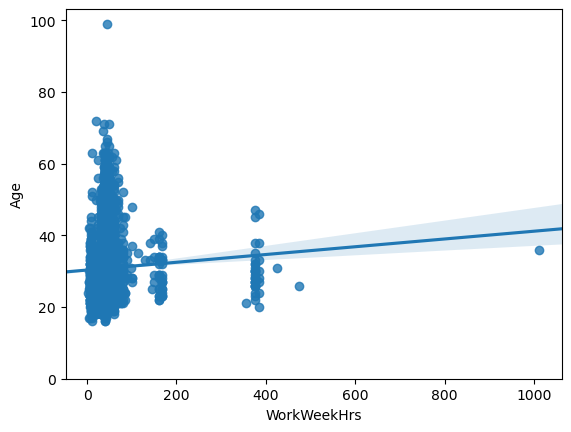

In [207]:
# your code goes here

numerical = ['Respondent', 'CompTotal','ConvertedComp','WorkWeekHrs','CodeRevHrs']

for i in numerical:
    print(df[[i,'Age']].corr())

sns.regplot(x='WorkWeekHrs', y = 'Age', data = df)
plt.ylim(0,)

#df[['Respondent','Age']].corr()
#plt.pcolor(df[df.columns & numerical], cmap='RdBu')
#plt.colorbar()
#plt.show()
#df[df.columns & numerical]

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
